# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

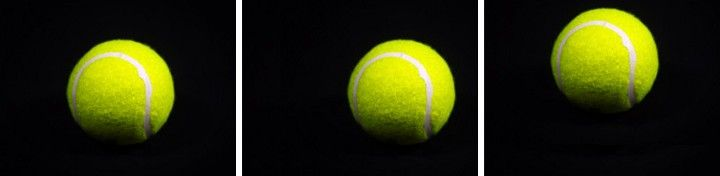



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









#KERAS
The Keras library provides the ability to use automatic data augmentation when training a model. This is achieved by using the ImageDataGenerator class. It supports image formats: jpeg, png, bmp, gif (Animated gifs will be truncated to the first frame).



The Keras library provides the ability to use data augmentation automatically when training a model. This is accomplished by using the ImageDataGenerator class. A variety of techniques are supported, as well as pixel scaling methods, such as:


*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline  **rotation_range**
*   Image brightness using the argument  **brightness_range**.
*   Image zoom using the argument **zoom_range**.
*   **rescale**: rescaling factor. We multiply the data by the value provided.
*   **shear_range**: Shear angle in counter-clockwise direction in degrees.
*   **validation_split**: Fraction of images reserved for validation (strictly between 0 and 1).
*   **fill_mode:** Points outside the boundaries of the input are filled according to the given mode:constant, nearest, wrap.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [ ]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #image library from python
from urllib.request import urlopen #Read an email address


First we upload an image from the interne


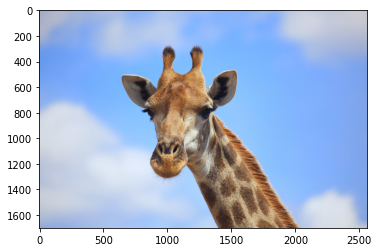

In [ ]:
url = 'http://getwallpapers.com/wallpaper/full/c/c/a/722839-giraffes-wallpapers-2560x1700-for-iphone-5s.jpg'
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The ImageDataGenerator constructor's arguments width_shift_range and height_shift_range control the amount of horizontal and vertical shift respectively



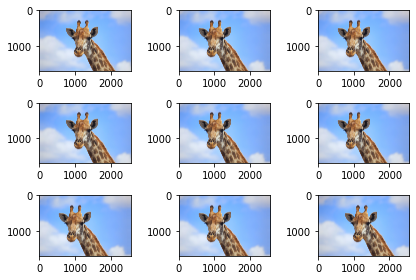

In [ ]:
# We convert the image to an arrangement
data = img_to_array(img)
# We made an expansion to a sample 
samples = expand_dims(data, 0)
# We create the data booster using only image change  
datagen = ImageDataGenerator(width_shift_range=[-100,100])
# We prepare the iterator
it = datagen.flow(samples, batch_size=1)
# We generate samples and show the results
for i in range(9):
	plt.subplot(330 + 1 + i)
	# Image batches are generated
	batch = it.next()
	image = batch[0].astype('uint8') #Is converted to a valid value so that it can be displayed as an image
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image rotation means reversing the rows or columns of pixels in the case of a vertical or horizontal rotation, respectively.
The augmentation is specified by a boolean argument **horizontal_flip** or **vertical_flip** for the class **ImageDataGenerator**.

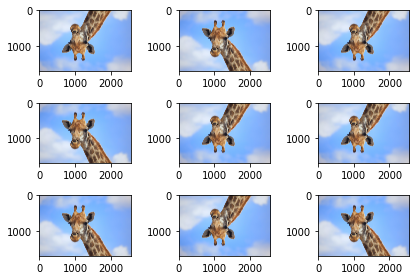

In [ ]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is uniformly sampled at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If floating, [lower limit, upper limit] = [1-zoom_range, 1 + zoom_range].

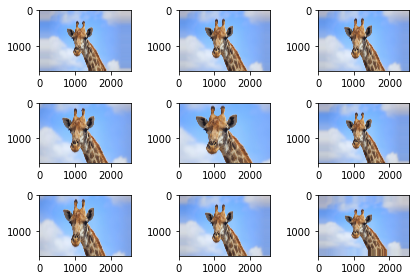

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.3) #float o Range [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a set number of degrees from 0 to 360. This may rotate the pixels out of the image frame and leave areas of the frame without pixel data to be completed.

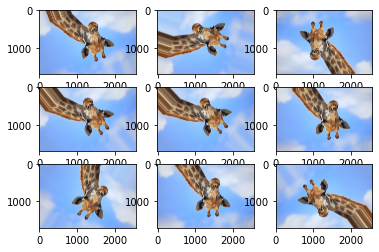

In [ ]:
datagen = ImageDataGenerator(rotation_range=200)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data from the dataset to be used, in many jobs an increase of data is used to increase the amount of training images and improve the accuracy of the work.


              featurewise_center: Boolean, set the average of each element to zero of all data.
              samplewise_center**: Boolean, set the average of each sample to zero
              featurewise_std_normalization: Boolean, divide the entries by the standard deviation (std.) of the data set, according to the characteristics.
              samplewise_std_normalization: Boolean, divide each data by its std.
              zca_epsilon: The default value is 1e-6.
              zca_whitening: Boolean, indicates if ZCA bleaching is applied.      

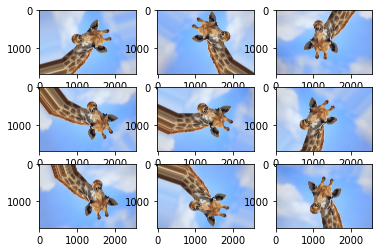

In [ ]:
datagen = ImageDataGenerator(
            rotation_range               = 90,
            width_shift_range            = [100,100],   
            height_shift_range           = [100,100],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now that we consider words, the work required is not so simple given the inherent complexity of language (we cannot replace every word with its synonym and even if we do, we run the risk of the meaning of the sentence changing completely). 
There are some libraries that can help us perform this task, we will start by analyzing the following ones:


1.   Text Attack
2.   Google Trans

# TextAttack
It is a Python framework for opponent attacks, opponent training and NLP data augmentation. We will focus only on data augmentation.

In [ ]:
!pip install textattack

     |████████████████████████████████| 327kB 2.7MB/s 
     |████████████████████████████████| 102kB 4.7MB/s 
     |████████████████████████████████| 686kB 6.2MB/s 
     |████████████████████████████████| 317kB 10.5MB/s 
     |████████████████████████████████| 245kB 14.5MB/s 
     |████████████████████████████████| 1.1MB 10.3MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 778kB 23.5MB/s 
     |████████████████████████████████| 235kB 31.4MB/s 
     |████████████████████████████████| 153kB 26.9MB/s 
     |████████████████████████████████| 3.0MB 30.5MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 1.7MB 42.5MB/s 
     |████████████████████████████████| 204kB 39.5MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 983kB 38.4MB/s 
     |████████████████████████████████| 1.1MB 43.3MB/s 
     |████████████████████████████████| 798kB 46.8MB/s 
 

In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-17 02:07:04 INFO: Downloading default packages for language: en (English)...
2020-10-17 02:07:47 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [4]:
text = "If you can dream it, you can do it. Always remember that this whole thing started whit a dream and a mause."

TextAttack provides four methods of data enhancement:



## WordNetAugmenter
Increases the text by replacing it with synonyms from WordNet's Thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives and adverbs are grouped in sets of cognitive synonyms (synsets), each of which expresses a different concept. WordNet superficially resembles a thesaurus, since it groups words according to their meaning.



In [5]:
aug = WordNetAugmenter();
aug.augment(text)

['If you can dream it, you can do it. incessantly remember that this whole thing started scintilla a dream and a mause.']


## EmbeddingAugmenter
 Increases the text by transforming words with their inlays, with a restriction to ensure that their cosine similarity is at least 0.8.


In [6]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:07<00:00, 67.1MB/s]
textattack: Unzipping file /root/.cache/textattack/tmp529tljb2.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Unless you can dream it, you can do it. Always remember that this whole thing started whith a dream and a mause.']

## CharSwapAugmenter
Increase text by substituting, deleting, inserting and exchanging adjacent characters.

In [7]:
aug = CharSwapAugmenter()
aug.augment(text)

['I you can dream it, you can do it. Always remember that this whole thing started hit a dream and a mause.']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions.
All 4 of these features occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [8]:
aug = EasyDataAugmenter()
aug.augment(text)

['If you can dream it, you can do it. remember Always that this whole thing started whit a dream and a mause.',
 'If you can dream it, you can do it. Always remember that this whole started a dream and a mause.',
 'If you amp can dream it, you bulge can do it. Always remember that this whole thing started whit a dream and a mause.',
 'If you can dream it, you can do it. Always think that this whole thing started scintilla a dream and a mause.']

Googletrans uses Google Translate's Ajax API for language detection and translation.



The key parameters for the **translate ()** method are:



1.   **src**: source language. this parameter is optional since **googletrans** will detect it.
2.   **dest**: itarget language. Mandatory parameter.

1.   **text**: the text to be translated from the source language to the target language. Parameter required.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then back to the original. During this retranslation, there is a slight change in the sentence between the original text and the retranslated text, but the general meaning of the sentence is still preserved.

Supported languages can be found at https://cloud.google.com/translate/docs/languages?hl=es

To get the best results it is recommended to make some tests with the languages, if the target language is very similar the translation does not lose information, however you can have the problem that the translation is too literal, this becomes a bit of a trial and error problem.


Some examples of languages:


*   Afrikáans	'af'

*   Chino (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japonés	'ja'
*   Latín	'la'


*   Español	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [9]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 972kB 9.5MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 102kB 11.4MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=98e9524b147e0fc2e08bd5a1f81cc1741c49be6fcaa47cc1974b0d02054dcc71
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=7c596c6199b3378fffbbcd59feb922bdc779bb825ee61d3c8e61a7e6c87d78b3
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [10]:
from googletrans import Translator
translator = Translator()

In [11]:
origin_text = "You cannot have a positive life and a negative mind"
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

You cannot have a positive life and a negative mind
あなたはポジティブな人生とネガティブな心を持つことはできません
You can't have a positive life and a negative mind
